# Aufgabe 18

email.graph
NetworKit.Graph(n=1133, m=5451)



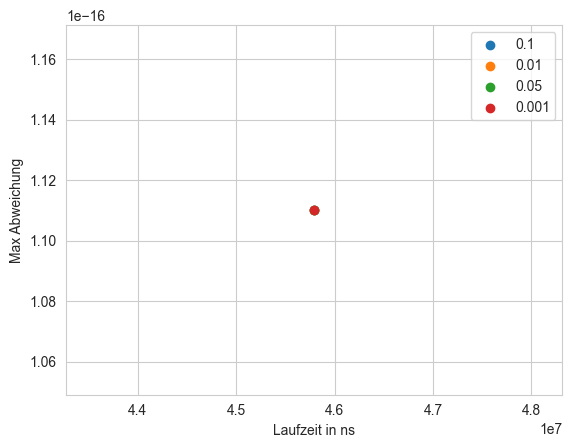

hep-th.graph
NetworKit.Graph(n=8361, m=15751)



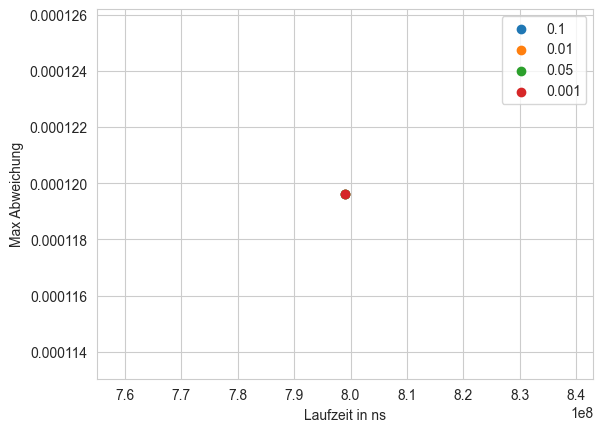

netscience.graph
NetworKit.Graph(n=1589, m=2742)



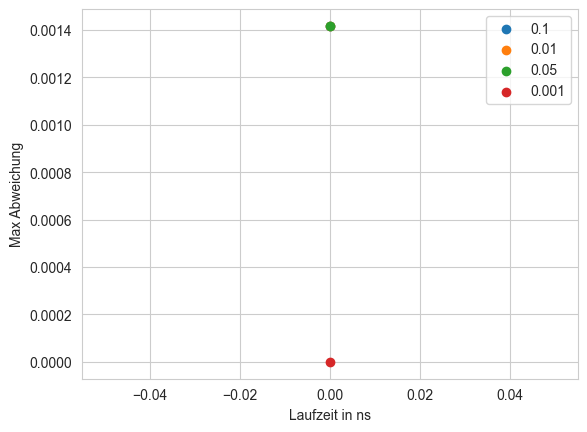

polblogs.graph
NetworKit.Graph(n=1490, m=16715)



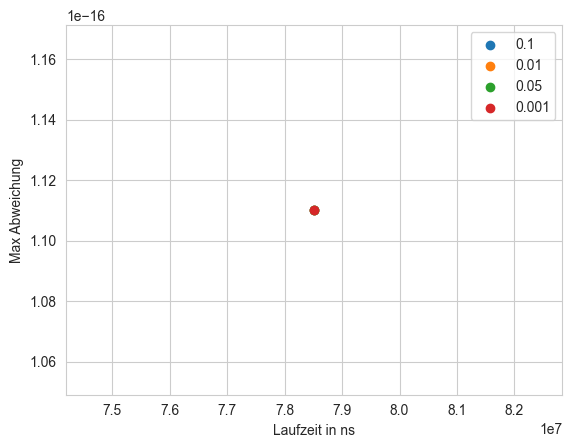

power.graph
NetworKit.Graph(n=4941, m=6594)



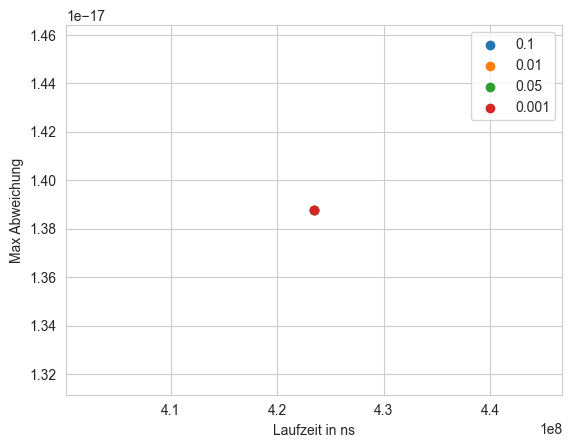

In [34]:
import time
import os
import networkit as nk
from networkit import centrality
import matplotlib.pyplot as plt

errorBounds = {0.1, 0.05, 0.01, 0.001}
labels = list()

for file in os.listdir("./graphs2"):
     if file.endswith(".graph"):
        G: nk.Graph = nk.readGraph("./graphs2/" + file, nk.Format.METIS)

        print(file)
        print(G)
        print()

        topNumb = G.numberOfNodes()

        T1_start = time.time_ns()
        closeCen = nk.centrality.Closeness(G, False, True)
        closeCen.run()

        topk = nk.centrality.TopCloseness(G, topNumb, first_heu=False, sec_heu=False)
        topk.run()
        T1_stop = time.time_ns()



        labels.append(file.__str__())

        for e in errorBounds:

            plt.xlabel("Laufzeit in ns")
            plt.ylabel("Max Abweichung")

            maxdiv = 0.0

            for x in range(topNumb):
                cenScore = closeCen.score(topk.topkNodesList()[x])
                topkScore = topk.topkScoresList()[x]

                curdiv = abs(cenScore - topkScore)

                if curdiv > e:
                    continue

                if(curdiv > maxdiv):
                    maxdiv = curdiv

            plt.scatter(x=T1_stop - T1_start, y=maxdiv)
        plt.legend(errorBounds)
        plt.show()